tau_solid:  10.11984487316571 tau_liquid:  10.950941004767833 tau_gas:  2.2107881002615555


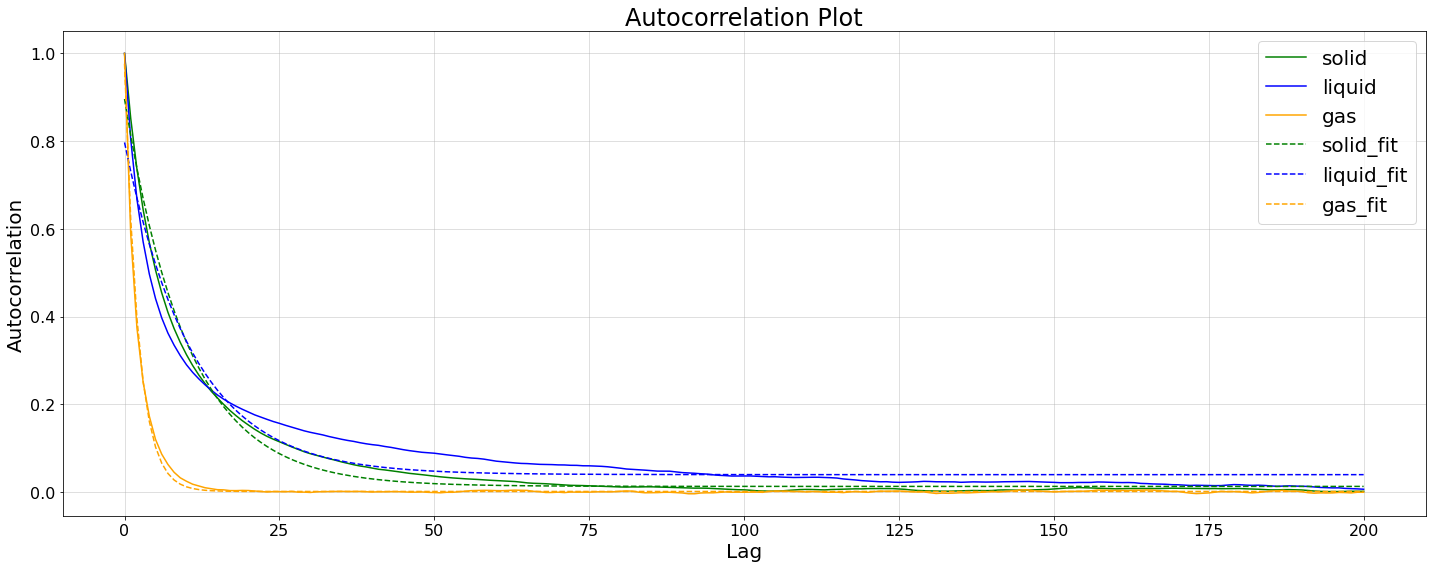

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from scipy.optimize import curve_fit

def exponential_func(x, a, b, c):
    return a * np.exp(-b * x) + c

df_solid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/SOLID/AUTOCORR/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
data_solid = df_solid['ACTUAL_PE']
df_liquid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/LIQUID/AUTOCORR/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
data_liquid = df_liquid['ACTUAL_PE']
df_gas = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/GAS/AUTOCORR/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
data_gas = df_gas['ACTUAL_PE']

autocorr_solid = sm.tsa.acf(data_solid, nlags=200)
autocorr_liquid = sm.tsa.acf(data_liquid, nlags=200)
autocorr_gas = sm.tsa.acf(data_gas, nlags=200)

x = np.linspace(0, 200, 201)
popt_solid, pcov_solid = curve_fit(exponential_func, x, autocorr_solid)
a_fit_solid, b_fit_solid, c_fit_solid = popt_solid
popt_liquid, pcov_liquid = curve_fit(exponential_func, x, autocorr_liquid)
a_fit_liquid, b_fit_liquid, c_fit_liquid = popt_liquid
popt_gas, pcov_gas = curve_fit(exponential_func, x, autocorr_gas)
a_fit_gas, b_fit_gas, c_fit_gas = popt_gas

print("tau_solid: ", (1/b_fit_solid), "tau_liquid: ", (1/b_fit_liquid), "tau_gas: ", (1/b_fit_gas))

plt.figure(figsize=(20, 8))
plt.plot(autocorr_solid, label='solid', color='green')
plt.plot(autocorr_liquid, label='liquid', color='blue')
plt.plot(autocorr_gas, label='gas', color='orange')
plt.plot(x, exponential_func(x, a_fit_solid, b_fit_solid, c_fit_solid), label='solid_fit', color='green', linestyle='--')
plt.plot(x, exponential_func(x, a_fit_liquid, b_fit_liquid, c_fit_liquid), label='liquid_fit', color='blue', linestyle='--')
plt.plot(x, exponential_func(x, a_fit_gas, b_fit_gas, c_fit_gas), label='gas_fit', color='orange', linestyle='--')
plt.xlabel('Lag', fontsize=20)
plt.ylabel('Autocorrelation', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Autocorrelation Plot', fontsize=24)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995
1000
1005
1010
1015
1020
1025
1030
1035
1040
1045
1050
1055
1060
1065
1070
1075
1080
1085
1090
1095
1100
1105
1110
1115
1120
1125
1130
1135
1140
1145
1150
1155
1160
1165
1170
1175
1180
1185
1190
1195
1200
1205
1210
1215
1220
1

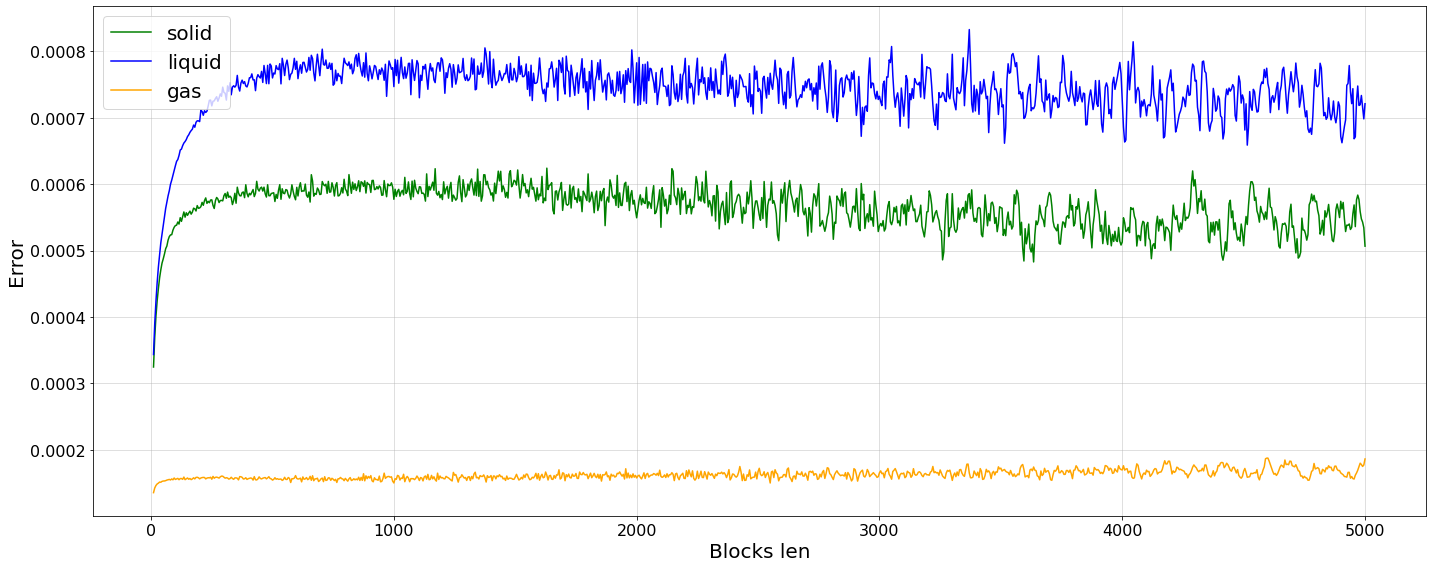

In [46]:
def calculate_error(average, averageSquared, n): # calculate progressive error for average blocking 
	if n == 0:
		return 0	
	return np.sqrt((averageSquared - average ** 2) / n)

def block_average (data, blocks, blockSize): # data blocking with parameters block number and size
	progressiveAverage = 0
	progressiveAverageSquared = 0
	progressiveError = 0

	for blockIndex in range(blocks):
		blockSum = 0

		for dataIndex in range(blockSize):
			blockSum += data[dataIndex + blockIndex * blockSize]

		blockMean = blockSum / blockSize

		progressiveAverage = (progressiveAverage * blockIndex + blockMean) / (blockIndex + 1)
		progressiveAverageSquared = (progressiveAverageSquared * blockIndex + blockMean**2) / (blockIndex + 1)
		progressiveError = calculate_error(progressiveAverage, progressiveAverageSquared, blockIndex)

	return progressiveError

x = []
error_solid = []
error_liquid = []
error_gas = []

for i in range(10, 5001, 5) :
    n = 500000 // i
    x.append(i)
    error_solid.append(block_average(data_solid, n, i))
    error_liquid.append(block_average(data_liquid, n, i))
    error_gas.append(block_average(data_gas, n, i))
    print(i)

plt.figure(figsize=(20, 8))
plt.plot(x, error_solid, label='solid', color='green')
plt.plot(x, error_liquid, label='liquid', color='blue')
plt.plot(x, error_gas, label='gas', color='orange')
plt.xlabel('Blocks len', fontsize=20)
plt.ylabel('Error', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

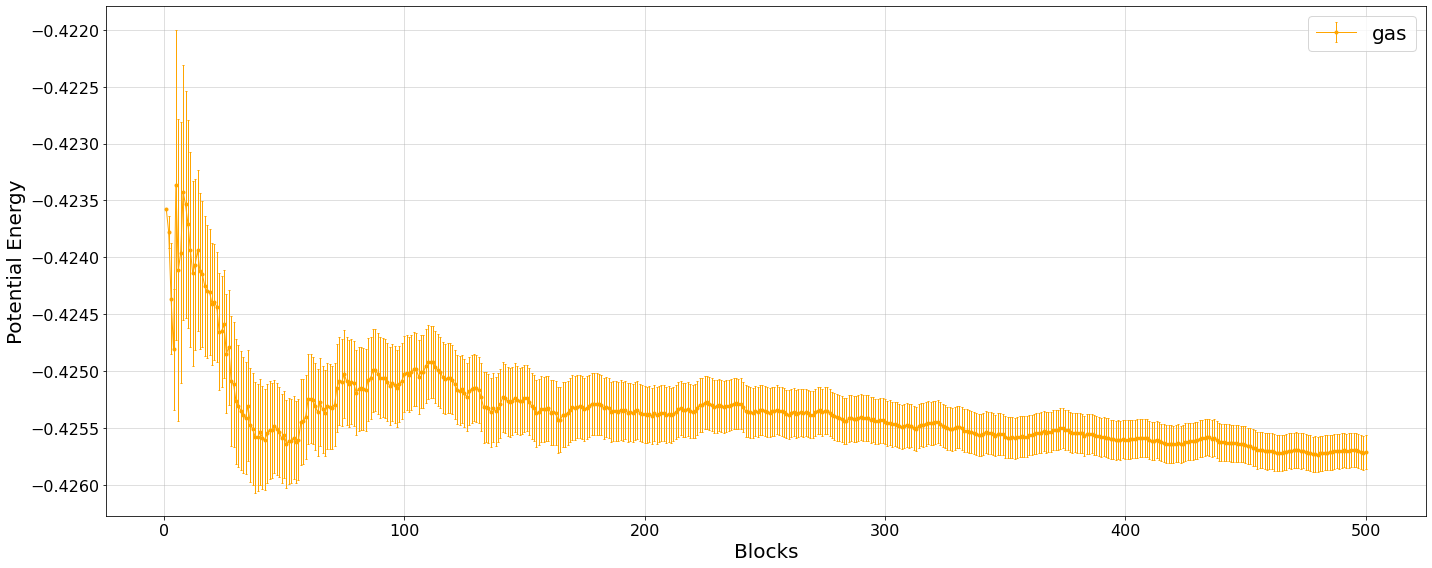

In [6]:
df_solid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/SOLID/FINAL/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
df_liquid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/LIQUID/FINAL/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])
df_gas = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/GAS/FINAL/potential_energy.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_PE', 'PE_AVE', 'ERROR'])

x = np.arange(1, 501, 1)

plt.figure(figsize=(20,8))
#plt.errorbar(x, df_solid['PE_AVE'], yerr=df_solid['ERROR'], fmt='o-', label='solid', color='green')
#plt.errorbar(x, df_liquid['PE_AVE'], yerr=df_liquid['ERROR'], fmt='o-', label='liquid', color='blue')
plt.errorbar(x, df_gas['PE_AVE'], yerr=df_gas['ERROR'], fmt='o-', label='gas', color='orange', markersize=3, linewidth=1, capsize=1)
plt.xlabel('Blocks', fontsize=20)
plt.ylabel('Potential Energy', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

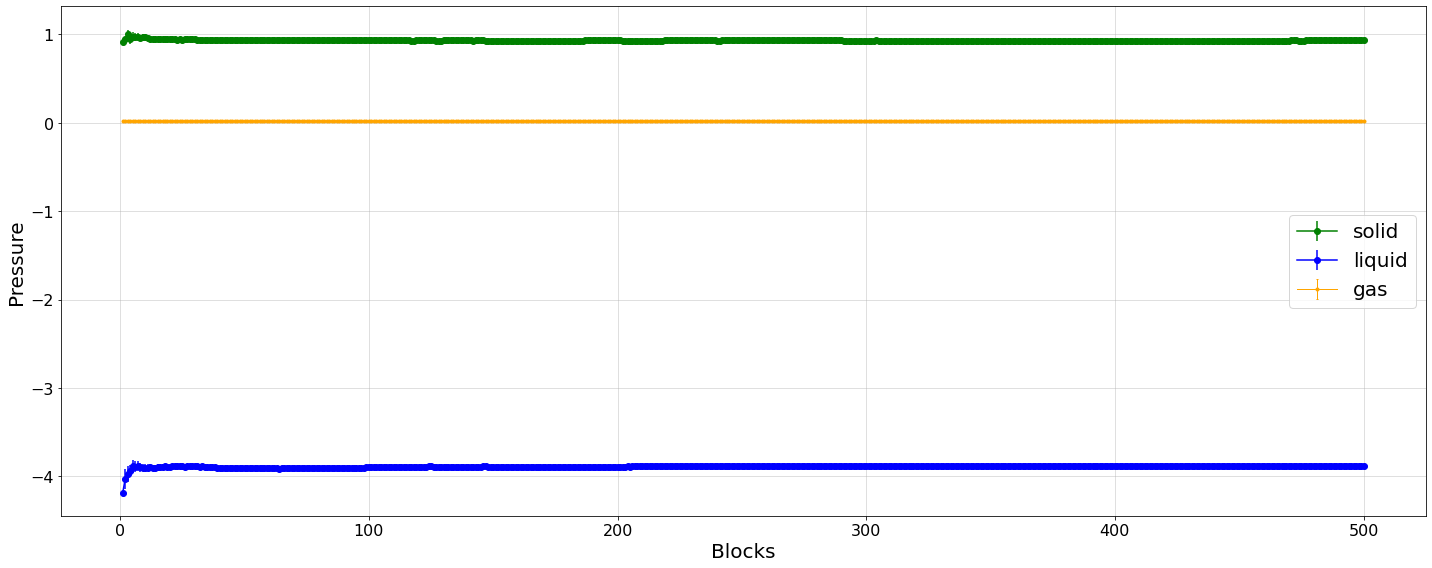

In [24]:
df_solid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/SOLID/FINAL/pressure.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_P', 'P_AVE', 'ERROR'])
df_liquid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/LIQUID/FINAL/pressure.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_P', 'P_AVE', 'ERROR'])
df_gas = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/GAS/FINAL/pressure.dat", delim_whitespace=True, skiprows=1, names=['BLOCK', 'ACTUAL_P', 'P_AVE', 'ERROR'])

x = np.arange(1, 501, 1)

plt.figure(figsize=(20, 8))
plt.errorbar(x, df_solid['P_AVE'], yerr=df_solid['ERROR'], fmt='o-', label='solid', color='green')
plt.errorbar(x, df_liquid['P_AVE'], yerr=df_liquid['ERROR'], fmt='o-', label='liquid', color='blue')
plt.errorbar(x, df_gas['P_AVE'], yerr=df_gas['ERROR'], fmt='o-', label='gas', color='orange', markersize=3, linewidth=1, capsize=1)
plt.xlabel('Blocks', fontsize=20)
plt.ylabel('Pressure', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()

/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/usr/lib/python3/dist-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  ret

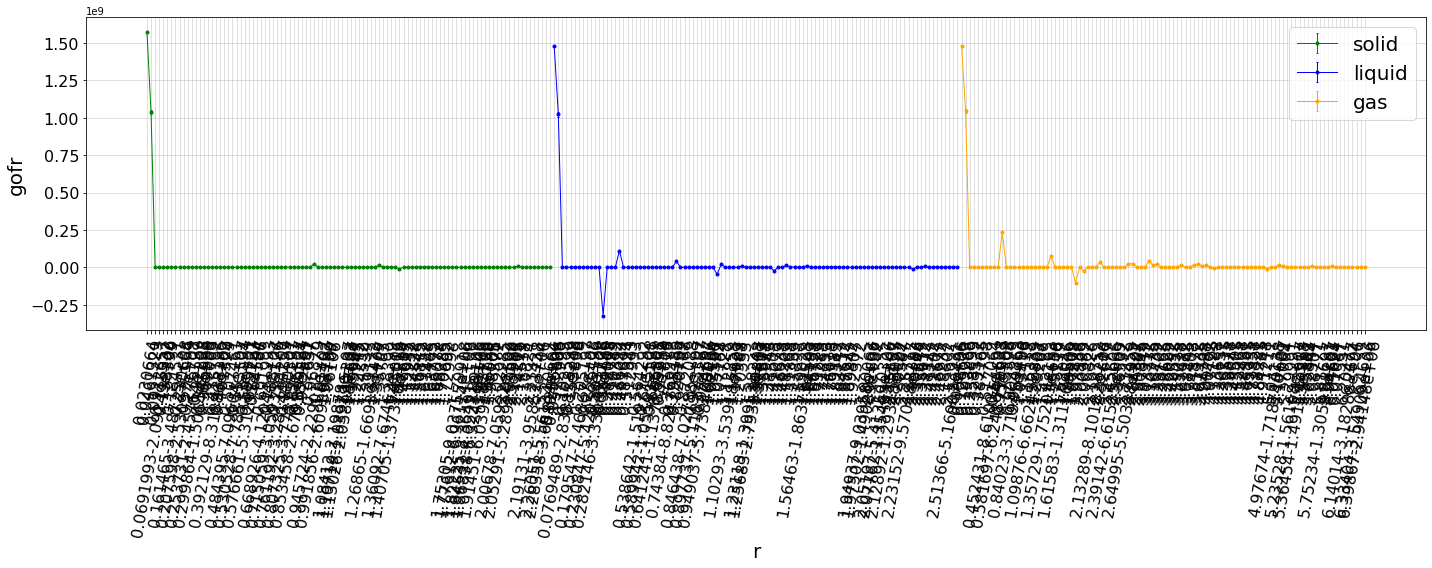

In [12]:
df_solid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/SOLID/FINAL/gofr.dat", delim_whitespace=True, skiprows=1, names=['DISTANCE', 'AVE_GOFR', 'ERROR'])
df_liquid = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/LIQUID/FINAL/gofr.dat", delim_whitespace=True, skiprows=1, names=['DISTANCE', 'AVE_GOFR', 'ERROR'])
df_gas = pd.read_csv("/home/davide/Simulazione_Numerica/Esercizio_07/NSL_SIMULATOR/OUTPUT/GAS/FINAL/gofr.dat", delim_whitespace=True, skiprows=1, names=['DISTANCE', 'AVE_GOFR', 'ERROR'])

plt.figure(figsize=(20, 8))
plt.errorbar(df_solid['DISTANCE'], df_solid['AVE_GOFR'], yerr=df_solid['ERROR'], fmt='o-', label='solid', color='green', markersize=3, linewidth=1, capsize=1)
plt.errorbar(df_liquid['DISTANCE'], df_liquid['AVE_GOFR'], yerr=df_liquid['ERROR'], fmt='o-', label='liquid', color='blue', markersize=3, linewidth=1, capsize=1)
plt.errorbar(df_gas['DISTANCE'], df_gas['AVE_GOFR'], yerr=df_gas['ERROR'], fmt='o-', label='gas', color='orange', markersize=3, linewidth=1, capsize=1)
plt.xlabel('r', fontsize=20)
plt.ylabel('gofr', fontsize=20)
plt.xticks(fontsize=16, rotation=80)
plt.yticks(fontsize=16)
plt.grid(True, alpha=0.5)
plt.legend(fontsize=20)
plt.tight_layout()
plt.show()